__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [27]:
function RK(f,conjunto,x0)
     x = x0
     h = conjunto[2]-conjunto[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(conjunto)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK (generic function with 2 methods)

In [7]:
g(x,t)= [x[2]-(x[2])^3,-x[1]-(x[2])^2]

g (generic function with 1 method)

In [8]:
conj=-1:0.01:5

-1.0:0.01:5.0

In [4]:
using PyPlot

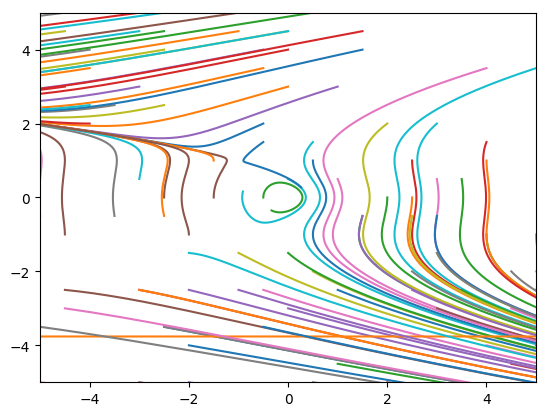

In [25]:
for i in 1:100
    w= 0.5*rand(-10:10,2,1)
    vec=RK(g,conj,w)
    x1 = map(x->x[1],vec)          
    x2 = map(x->x[2],vec)    
    xlim(-5,5)
    ylim(-5,5)  
    plot(x1,x2)
end

Se calcula el Jacobiano:
$$J=
\begin{bmatrix}
   \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
   \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \\
\end{bmatrix}$$


Los puntos críticos son:

$u(x,y)=y-y^3\space y \space v(x,y)=-x-y^2$  
factorizando obtenemos que $y(1-y^2)=0$$\space$ entonces $y=0,1,-1$  y para $v(x,y)$ los puntos son $0,1$
entonces J=:
$$J=\begin{bmatrix}
    0 & 1-3y^2 \\
   -1 & -2y \\
\end{bmatrix}$$ 
 y en $(0,0)$ tenemos que:
$$J=\begin{bmatrix}
    0 & 1 \\
   -1 & 0 \\
\end{bmatrix}$$ 

Entoncds $$\Delta = -1$$ $\space$  y $\space$ $$\tau = 0$$



_Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

In [28]:
h(x,t)= [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
   

h (generic function with 1 method)

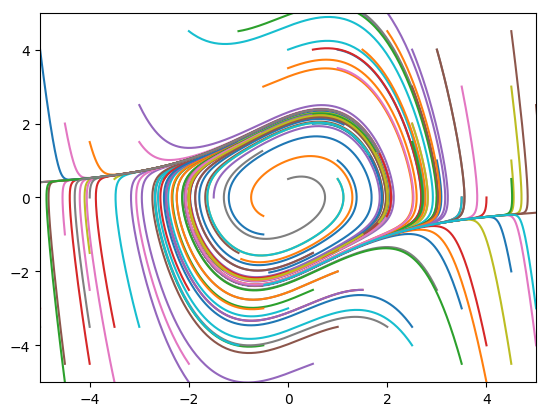

In [29]:
for i in 1:100
    w= 0.5*rand(-10:10,2,1)
    vec=RK(h,conjunto,w)
    x1 = map(x->x[1],vec)          
    x2 = map(x->x[2],vec)
    
    xlim(-5,5)
    ylim(-5,5)  
    plot(x1,x2)
end

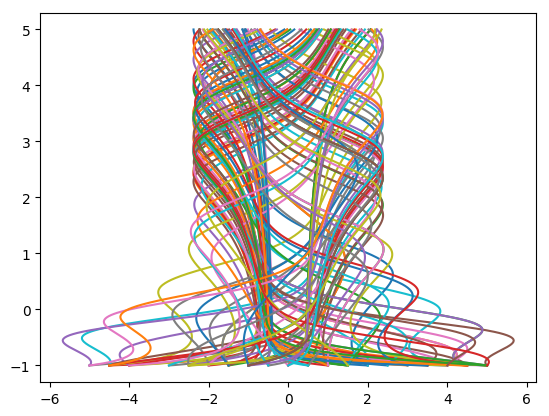

In [31]:
for i in 1:100
w= 0.5*rand(-10:10,2,1)
vec=RK(h,conjunto,w)
x2 = map(x->x[2],vec)   
plot(x2,conjunto)
end
#Ahora para ver dx/dt